In [20]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
model = Sequential()
model.add(Input(shape=(128, 128, 3))) 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(38, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 6, 6, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 32)       │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,724 (1.85 MB)

 Trainable params: 161,382 (630.40 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 322,766 (1.23 MB)

In [39]:
train_datagen=ImageDataGenerator(rescale=None,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [40]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [41]:
train_set=train_datagen.flow_from_directory('/kaggle/input/leaf-disease-detection-dataset/dataset/train',
                                           target_size=(128,128),
                                           batch_size=32,
                                           class_mode='categorical')

Found 70295 images belonging to 38 classes.


In [42]:
labels=(train_set.class_indices)
print(labels)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [43]:
test_set=test_datagen.flow_from_directory('/kaggle/input/leaf-disease-detection-dataset/dataset/test',
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode='categorical')

Found 17572 images belonging to 38 classes.


In [44]:
labels2=(test_set.class_indices)
print(labels)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [46]:
history=model.fit(train_set,
                    steps_per_epoch=375,
                    epochs=10,
                    validation_data = test_set,
                    validation_steps = 125)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 311ms/step - accuracy: 0.2973 - loss: 2.5049 - val_accuracy: 0.0290 - val_loss: 5.0629
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 270ms/step - accuracy: 0.4892 - loss: 1.6765 - val_accuracy: 0.0282 - val_loss: 7.2384
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 95s 255ms/step - accuracy: 0.5919 - loss: 1.3225 - val_accuracy: 0.0322 - val_loss: 6.3939
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 245ms/step - accuracy: 0.6781 - loss: 1.0466 - val_accuracy: 0.0262 - val_loss: 7.1003
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 211ms/step - accuracy: 0.7140 - loss: 0.9026 - val_accuracy: 0.0229 - val_loss: 7.5012
Epoch 6/10
  9/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7622 - loss: 0.8223

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 198ms/step - accuracy: 0.7371 - loss: 0.8332 - val_accuracy: 0.0272 - val_loss: 9.9033
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 235ms/step - accuracy: 0.7566 - loss: 0.7597 - val_accuracy: 0.0278 - val_loss: 8.2672
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 230ms/step - accuracy: 0.7907 - loss: 0.6598 - val_accuracy: 0.0245 - val_loss: 8.3171
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 226ms/step - accuracy: 0.8006 - loss: 0.6062 - val_accuracy: 0.0268 - val_loss: 9.6551
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 206ms/step - accuracy: 0.8100 - loss: 0.5724 - val_accuracy: 0.0261 - val_loss: 8.8464


In [65]:
import plotly.graph_objects as go
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig = go.Figure()

# Training Accuracy
fig.add_trace(go.Scatter(x=epochs, y=train_acc, mode='lines+markers', name='Training Accuracy', line=dict(color='blue')))
# Validation Accuracy
fig.add_trace(go.Scatter(x=epochs, y=val_acc, mode='lines+markers', name='Validation Accuracy', line=dict(color='red')))
# Training Loss (using a secondary y-axis)
fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Training Loss', line=dict(color='green'), yaxis="y2"))
# Validation Loss
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss', line=dict(color='purple'), yaxis="y2"))
fig.update_layout(
    title="Training & Validation Accuracy and Loss",
    xaxis=dict(title="Epochs"),
    yaxis=dict(title="Accuracy", titlefont=dict(color="blue"), tickfont=dict(color="blue")),
    yaxis2=dict(title="Loss", overlaying="y", side="right", titlefont=dict(color="green"), tickfont=dict(color="green")),
    legend=dict(x=0.85, y=0.15),
    hovermode="x unified",
    template="plotly_dark"
)

fig.show()


In [67]:
Label=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy',
       'Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_',
       'Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot','Grape___Esca_(Black_Measles)',
       'Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot',
       'Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight',
       'Potato___healthy','Potato___Late_blight','Raspberry___healthy','Soybean___healthy',
       'Squash___Powdery_mildew','Strawberry___healthy','Strawberry___Leaf_scorch','Tomato___Bacterial_spot',
       'Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot',
       'Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [108]:
import numpy as np
from keras.preprocessing import image

test_images = [
    '/kaggle/input/leaf-disease-detection-dataset/images_for_test/CornCommonRust1.JPG',
    '/kaggle/input/leaf-disease-detection-dataset/images_for_test/AppleCedarRust3.JPG',
    '/kaggle/input/leaf-disease-detection-dataset/images_for_test/PotatoEarlyBlight2.JPG',
    '/kaggle/input/leaf-disease-detection-dataset/images_for_test/AppleScab2.JPG'    
]

for img_path in test_images:
    test_image = image.load_img(img_path, target_size=(128, 128))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    results = model.predict(test_image)
    predicted_class_index = results.argmax()
    predicted_class_probability = results[0][predicted_class_index]
    predicted_label = Label[predicted_class_index]  

 
    print(f"Image: {img_path}")
    print(f"Predicted Class: {predicted_label}")
    print(f"Probability: {predicted_class_probability:.4f}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/leaf-disease-detection-dataset/images_for_test/CornCommonRust1.JPG
Predicted Class: Corn_(maize)___Common_rust_
Probability: 1.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/leaf-disease-detection-dataset/images_for_test/AppleCedarRust3.JPG
Predicted Class: Apple___Cedar_apple_rust
Probability: 0.5887

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/leaf-disease-detection-dataset/images_for_test/PotatoEarlyBlight2.JPG
Predicted Class: Potato___Early_blight
Probability: 1.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /kaggle/input/leaf-disease-detection-dataset/images_for_test/AppleScab2.JPG
Predicted Class: Apple___Apple_scab
Probability: 0.7843



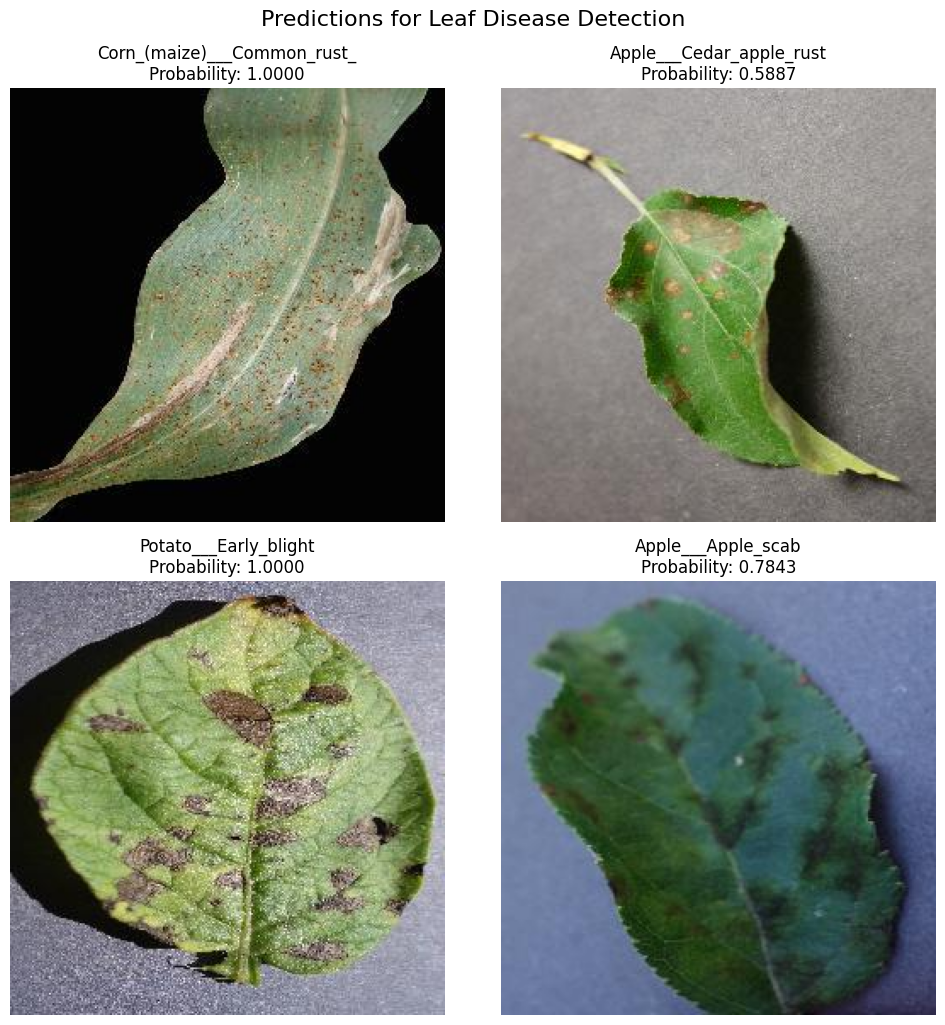

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax, img_path, label, probability in zip(axes, test_images, predicted_labels, predicted_probabilities):
    img = image.load_img(img_path)  
    ax.imshow(img)
    ax.set_title(f"{label}\nProbability: {probability:.4f}")
    ax.axis('off')

plt.tight_layout()
plt.suptitle("Predictions for Leaf Disease Detection", fontsize=16, y=1.02)
plt.show()


In [130]:
model_json=model.to_json()
with open("leaf_model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")
print("bruuuu")

bruuuu
